**Question 1:  What is Boosting in Machine Learning? Explain how it improves weak learners.**

**Answer:**
Boosting in Machine Learning is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing, such as shallow decision trees) to build a strong predictive model.

How it improves weak learners:
* By sequentially correcting mistakes of previous models, boosting reduces bias and builds a more accurate model.
* Each weak learner is forced to focus on the hard-to-predict instances, leading to improved overall performance.
* The final boosted model is usually much more powerful than a single weak learner.

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

**Answer:** The key difference between AdaBoost and Gradient Boosting lies in how they train subsequent models and update weights/loss:

*AdaBoost (Adaptive Boosting):*

* Assigns weights to training samples. Initially, all samples have equal weights.
* After each weak learner (e.g., decision stump) is trained, it increases the weights of misclassified samples so the next learner focuses more on those difficult cases.
* The final model is a weighted majority vote (classification) or weighted sum (regression) of all weak learners.

*Gradient Boosting:*
* Instead of updating sample weights, it fits each new learner to the residual errors (gradients of the loss function) made by the previous model.
* Uses gradient descent to minimize a chosen loss function (e.g., log loss, MSE).
* The final model is built by sequentially adding learners to correct errors, with each learner contributing a scaled step toward minimizing loss.

**Question 3: How does regularization help in XGBoost?**

**Answer:** Regularization in XGBoost (Extreme Gradient Boosting) helps improve generalization and prevent overfitting by adding penalty terms to the objective function. Unlike standard Gradient Boosting, XGBoost includes both L1 (Lasso) and L2 (Ridge) regularization.

**Question 4: Why is CatBoost considered efficient for handling categorical data?**

**Answer:** CatBoost is considered highly efficient for handling categorical data because it has a built-in mechanism to process categorical features directly, without requiring manual preprocessing like one-hot encoding or label encoding.

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

**Answer:**Boosting techniques are often preferred over bagging methods when the goal is to achieve higher predictive accuracy and handle complex decision boundaries. Since boosting reduces bias by focusing on hard-to-classify samples, it performs well in many real-world applications where fine-grained distinctions are needed.

Some real-world applications:

1. Finance (Credit Scoring & Fraud Detection):
* Boosting models (e.g., XGBoost, LightGBM) are widely used to detect fraudulent transactions and predict loan defaults, where even small misclassifications can have large consequences.

2. Healthcare (Disease Prediction & Medical Diagnosis):
* Boosting helps improve diagnostic accuracy in detecting diseases like cancer or diabetes, where reducing false negatives is critical.

3. E-commerce & Marketing (Customer Churn Prediction / Recommendation Systems):

* Boosting captures subtle patterns in customer behavior, improving personalized recommendations and churn prediction.



In [3]:
'''
Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.)

Answer:
'''

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize and train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9736842105263158


In [4]:
'''
Question 7:  Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
(Include your Python code and output in the code box below.)

Answer:
'''
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# 1. Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize and train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.8004451261281281


In [5]:
'''
Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
(Include your Python code and output in the code box below.)

Answer:
'''
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 4. Define parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 6. Get best parameters
print("Best Parameters:", grid_search.best_params_)

# 7. Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.2}
Model Accuracy: 0.956140350877193


In [10]:

!pip install catboost


Model Accuracy: 0.9649122807017544


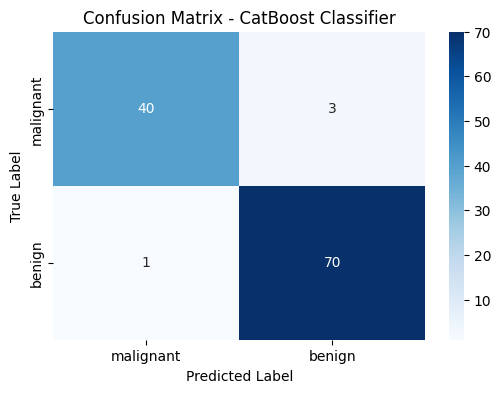

In [9]:
'''
Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.)

Answer:
'''

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize and train CatBoost Classifier
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Accuracy
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", acc)

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 7. Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:
* Data preprocessing & handling missing/categorical values
* Choice between AdaBoost, XGBoost, or CatBoost
* Hyperparameter tuning strategy
* Evaluation metrics you'd choose and why
* How the business would benefit from your model

(Include your Python code and output in the code box below.)

**Answer:**
1. Preprocessing (missing + categorical):
* Split train/test with stratification.
* Numeric: SimpleImputer(strategy="median") → (optional) StandardScaler (trees don’t need scaling but helps if you try linear models too).
* Categorical: SimpleImputer(strategy="most_frequent") → OneHotEncoder(handle_unknown="ignore").
* Use a ColumnTransformer inside a Pipeline to avoid leakage.

2. Algorithm choice (AdaBoost vs XGBoost vs CatBoost):
* Prefer XGBoost for tabular, imbalanced data with mixed feature types; set scale_pos_weight = (#neg / #pos); supports regularization and robust tree growth.
* CatBoost is great when many categorical features exist (native handling, ordered boosting).
* AdaBoost is a light baseline; less flexible than gradient-boosting families, but good fallback.

3. Hyperparameter tuning:
* Use RandomizedSearchCV (faster than grid) with stratified CV and ROC-AUC scoring; tune n_estimators, learning_rate, max_depth, subsample, colsample_bytree (XGB).
* Early stopping if library supports it (kept simple here).

4. Evaluation metrics (why):
* ROC-AUC (threshold-free, good overall separability).
* PR-AUC (more informative for imbalanced data).
* F1 (balance precision/recall).
* Confusion matrix + threshold tuning if business wants fewer false negatives (missed defaulters) or fewer false positives (unnecessarily rejected).

5. Business impact:
* Better risk stratification -> lower default rates.
* Explainable features (gain/importance, SHAP) -> compliant decisions.
* Profit-aware thresholds -> maximize expected profit / minimize loss (e.g., cost matrix for FP/FN).
* A/B deploy with monitoring (drift, stability, fairness).

In [2]:
'''
Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

(Include your Python code and output in the code box below.)
Answer:

'''
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# 1. Load dataset (loan dataset can be similar in structure)
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Define XGBoost with grid search for learning_rate
param_grid = {"learning_rate": [0.01, 0.05, 0.1]}
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

grid = GridSearchCV(xgb, param_grid, cv=3, scoring="roc_auc")
grid.fit(X_train, y_train)

# 4. Evaluate best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("Best Params:", grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Params: {'learning_rate': 0.1}
ROC-AUC: 0.9923941798941799

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

